### This notebook covers:
* Detailed overview of python string methods
* Pandas .str family of methods
* Advanced splits and replacements in Pandas
* Hands-on Introduction to Regex:
    - Character sets, anchors, metasequences, quantifiers and more.

### Revision:
* String methods in python:
    - len(s), center(50,'*'), startswith('a'), endswith('a'), in operator, list comprehension
    - title(), upper(), lower(), capitalize(), swapcase()
    - s.find('substring',11, 20), s.rfind('substring')
    - df.col_name.str.method()
    - df.col_name.str.strip(), lstrip(), rstrip()
    - df.col_name.str.split(' \s\t\n',expand=True, n=3)
    - df.col_nane.str.split().str.get(1)
    - df.col_name.str.cat('s', sep='_')
    - df.col_name.str.slice(4,20,1)
    - df.col_name.str.match('ITA')
    - df.col_name.str.contains('AB')
    - dummies = marathon['Years Ran'].str.get_dummies(sep=':')  - Gives columns of values in a given columns with seperator.
    - s.replace(to_replace, replacing_value, case=True)
* Regex: https://regex101.com
    - Meta Sequences:
        - \d matches [0-9]
        - \s matches [\r\t\n ]
        - \w matches [a-zA-Z0-9]
        - . matches every character except \n
        -  \\. to match .
        - Changing w,s,d to uppercase will match opposites/complement.
    - Quantifiers:
        - \+ one or more characters
        - ? zero or one character
        - {3,4} 3 to 4 characters.
        - \* zero or more characters.
    - Groups:
        - capture group that matches.
        - () = everything
        - (m) = all the letters m
        - (\w+er) = all words ending with er.
        - (\w+er) \1 = \1 matches another sequence of first capturing gorup.
    - Character Sets/classes:
        - [Am] = A or m 
        - [dl]ogs = dogs/logs, [^dl]ogs = except d/l
        - [b-i]ogs = b,c,d,e,f,g,h,i
        - [a-zA-Z]+ = all words
    - Anchors:
        - ^ : matches at the beginning
        - $ : matches at the end
        - \b : word boundry
        - \B : non-word boundry
    - re.findall(pattern, string)
    - re.sub(pattern, replaced, string)
    - use re.compile() when you are working with more than 100 regexes.
* Regex in pandas:
    - df[df.col_name.str.contains('Example')]
    - df.col_name.str.split(pattern, expand=True)
    - df.col_name.str.replace(pattern_to_be_replaced, new_pattern, regex=True)
    

### Dataset: Boston Marathon Runners

In [1]:
import pandas as pd
import numpy as np
marathon_url = 'https://andybek.com/pandas-marathon'
marathon = pd.read_csv(marathon_url)

In [2]:
marathon

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015
...,...,...,...,...,...,...,...,...,...,...
995,"Larosa, Mark",38,M,North Andover,MA,USA,2:56:06,996,940,2015:2016
996,"Williamson, Jerry A",43,M,Raleigh,NC,USA,2:56:06,997,941,2015
997,"Mccue, Daniel T",40,M,Arlington,MA,USA,2:56:06,998,942,NaN
998,"Larosa, John",35,M,Danbury,CT,USA,2:56:07,999,943,NaN


In [3]:
marathon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Name           1000 non-null   object
 1   Age            1000 non-null   int64 
 2   M/F            1000 non-null   object
 3   City           1000 non-null   object
 4   State          807 non-null    object
 5   Country        1000 non-null   object
 6   Official Time  1000 non-null   object
 7   Overall        1000 non-null   int64 
 8   Gender         1000 non-null   int64 
 9   Years Ran      315 non-null    object
dtypes: int64(3), object(7)
memory usage: 78.2+ KB


### String Methods in Python

In [4]:
# len, center, startswith, endswith, in operator, list comprehension

In [5]:
s = 'Welcome to the text manipulation section'
len(s)

40

In [6]:
s.center(100, '*')

'******************************Welcome to the text manipulation section******************************'

In [7]:
s.center(30, '*')

'Welcome to the text manipulation section'

In [8]:
s.center(50, '*')

'*****Welcome to the text manipulation section*****'

In [9]:
s.startswith('Wel'), s.startswith('Wl')

(True, False)

In [10]:
s.endswith('ion'), s.endswith('N')

(True, False)

In [11]:
'text' in s, 'Text' in s

(True, False)

In [12]:
# text transforms within list comprehension

In [13]:
names = ['Chetan', 'Akash', 'Andrew', 'Brian']
[len(name) for name in names]

[6, 5, 6, 5]

In [14]:
[name.startswith('A') for name in names]

[False, True, True, False]

### Vectorized String Ooperations in Pandas

In [15]:
marathon.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


In [16]:
marathon.Name

0         Kirui, Geoffrey 
1           Rupp, Galen   
2          Osako, Suguru  
3         Biwott, Shadrack
4           Chebet, Wilson
              ...         
995           Larosa, Mark
996    Williamson, Jerry A
997        Mccue, Daniel T
998           Larosa, John
999         Sanchez, Sam R
Name: Name, Length: 1000, dtype: object

In [17]:
marathon.Name.str.len()

0      17
1      14
2      15
3      16
4      14
       ..
995    12
996    19
997    15
998    12
999    14
Name: Name, Length: 1000, dtype: int64

In [18]:
marathon.Name.str.startswith('A')

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Name, Length: 1000, dtype: bool

### Case Operations

In [19]:
marathon.City

0           Keringet
1           Portland
2       Machida-City
3      Mammoth Lakes
4           Marakwet
           ...      
995    North Andover
996          Raleigh
997        Arlington
998          Danbury
999         Santa Fe
Name: City, Length: 1000, dtype: object

In [20]:
marathon.City.str.title()

0           Keringet
1           Portland
2       Machida-City
3      Mammoth Lakes
4           Marakwet
           ...      
995    North Andover
996          Raleigh
997        Arlington
998          Danbury
999         Santa Fe
Name: City, Length: 1000, dtype: object

In [21]:
marathon.City.str.upper() # swapcase(), lower(), capitalize()

0           KERINGET
1           PORTLAND
2       MACHIDA-CITY
3      MAMMOTH LAKES
4           MARAKWET
           ...      
995    NORTH ANDOVER
996          RALEIGH
997        ARLINGTON
998          DANBURY
999         SANTA FE
Name: City, Length: 1000, dtype: object

In [22]:
marathon.City.str.capitalize()

0           Keringet
1           Portland
2       Machida-city
3      Mammoth lakes
4           Marakwet
           ...      
995    North andover
996          Raleigh
997        Arlington
998          Danbury
999         Santa fe
Name: City, Length: 1000, dtype: object

### Finding Characters and Words

In [23]:
s

'Welcome to the text manipulation section'

In [24]:
s.find("k")

-1

In [25]:
s.find('t')

8

In [26]:
s.find('text')

15

In [27]:
marathon.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


In [28]:
marathon.Name.str.find('Andy').value_counts()

-1     998
 8       1
 12      1
Name: Name, dtype: int64

In [29]:
marathon.Name.str.find('James').value_counts()

-1     988
 8       3
 10      3
 7       2
 9       2
 12      1
 6       1
Name: Name, dtype: int64

In [30]:
p = 'pandas numpy numpy pandas'

In [31]:
p.find('pandas')

0

In [32]:
p.rfind('pandas')

19

In [33]:
p.find('p', 4)

10

In [34]:
p.find('p', 11, 20)

16

### Strips and Whitespaces

In [35]:
print('pandas', '\tnumpy')

pandas 	numpy


In [36]:
print('pandas', '\nnumpy')

pandas 
numpy


In [37]:
''.isspace(), ' '.isspace(), '\n'.isspace(), '\t'.isspace()

(False, True, True, True)

In [38]:
spaced = '   This is pandas course    \n\t     '
print(spaced)

   This is pandas course    
	     


In [39]:
spaced.lstrip()

'This is pandas course    \n\t     '

In [40]:
spaced.strip()

'This is pandas course'

In [41]:
marathon.Name.iloc[0]

' Kirui, Geoffrey '

In [42]:
marathon.Name = marathon.Name.str.strip()

### String Splitting And Concatenation

In [43]:
# split(), get(), cat()

In [44]:
s.split()  
# split based on any white space while split(' ') only splits based on one white space

['Welcome', 'to', 'the', 'text', 'manipulation', 'section']

In [45]:
s.split('t')

['Welcome ', 'o ', 'he ', 'ex', ' manipula', 'ion sec', 'ion']

In [46]:
# split character is discarded

In [47]:
marathon.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


In [48]:
marathon.Name.str.split(',')

0          [Kirui,  Geoffrey]
1              [Rupp,  Galen]
2            [Osako,  Suguru]
3         [Biwott,  Shadrack]
4           [Chebet,  Wilson]
                ...          
995           [Larosa,  Mark]
996    [Williamson,  Jerry A]
997        [Mccue,  Daniel T]
998           [Larosa,  John]
999         [Sanchez,  Sam R]
Name: Name, Length: 1000, dtype: object

In [49]:
marathon.Name.str.split(', ').str.get(0)

0           Kirui
1            Rupp
2           Osako
3          Biwott
4          Chebet
          ...    
995        Larosa
996    Williamson
997         Mccue
998        Larosa
999       Sanchez
Name: Name, Length: 1000, dtype: object

In [50]:
marathon['First Name'] = marathon.Name.str.split(', ').str.get(0)
marathon['Last Name'] = marathon.Name.str.split(', ').str.get(1)

In [51]:
marathon.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,First Name,Last Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN,Rupp,Galen
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015,Chebet,Wilson


In [52]:
marathon['M/F'].str.cat(marathon.Age.astype(str), sep='_')

0      M_24
1      M_30
2      M_25
3      M_32
4      M_31
       ... 
995    M_38
996    M_43
997    M_40
998    M_35
999    M_35
Name: M/F, Length: 1000, dtype: object

### More Split parameters

In [53]:
marathon.drop(['First Name', 'Last Name'], axis=1, inplace=True)

In [54]:
marathon.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015


In [55]:
marathon.Name.str.split(', ', expand=True)

,0,1
0,Kirui,Geoffrey
1,Rupp,Galen
2,Osako,Suguru
3,Biwott,Shadrack
4,Chebet,Wilson
...,...,...
995,Larosa,Mark
996,Williamson,Jerry A
997,Mccue,Daniel T
998,Larosa,John


In [56]:
marathon.Name.str.split(expand=True)

,0,1,2,3,4
0,"Kirui,",Geoffrey,None,None,None
1,"Rupp,",Galen,None,None,None
2,"Osako,",Suguru,None,None,None
3,"Biwott,",Shadrack,None,None,None
4,"Chebet,",Wilson,None,None,None
...,...,...,...,...,...
995,"Larosa,",Mark,None,None,None
996,"Williamson,",Jerry,A,None,None
997,"Mccue,",Daniel,T,None,None
998,"Larosa,",John,None,None,None


In [57]:
marathon[marathon.Name.str.split(expand=True).count(axis=1) ==5]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran
203,"Cifuentes Fetiva, Miguel Angel Sr.",38,M,Bogota,NaN,COL,2:40:46,204,182,2015
467,"Martinez Solano, Juan Manuel Jr.",28,M,Bogota,NaN,COL,2:47:51,468,435,NaN
678,"Melendez, Carlos Manuel M. Sr.",38,M,"Quesada, San Carlos",NaN,CRC,2:51:45,679,639,NaN
733,"Castano Gonzalez, Angel U. Sr.",41,M,Medellin,NaN,COL,2:52:35,734,691,NaN


In [58]:
marathon.Name.str.split(expand=True, n=1)

,0,1
0,"Kirui,",Geoffrey
1,"Rupp,",Galen
2,"Osako,",Suguru
3,"Biwott,",Shadrack
4,"Chebet,",Wilson
...,...,...
995,"Larosa,",Mark
996,"Williamson,",Jerry A
997,"Mccue,",Daniel T
998,"Larosa,",John


In [59]:
marathon[['First Name', 'Last Name']] = marathon.Name.str.split(', ', expand=True)

In [60]:
marathon.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,First Name,Last Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN,Rupp,Galen
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015,Chebet,Wilson


### Challenge 1

In [85]:
# 1. How many runners in our dataset have 'James' as Last Name? 
(marathon['Last Name'] == 'James').sum()
marathon['Last Name'].str.find('James').value_counts()

-1    988
 0     12
Name: Last Name, dtype: int64

In [72]:
# 2. Split all City names in dataset by '-', 
# create a df containing each split component
marathon.City.str.split('-',expand=True)

,0,1,2,3
0,Keringet,None,None,None
1,Portland,None,None,None
2,Machida,City,None,None
3,Mammoth Lakes,None,None,None
4,Marakwet,None,None,None
...,...,...,...,...
995,North Andover,None,None,None
996,Raleigh,None,None,None
997,Arlington,None,None,None
998,Danbury,None,None,None


In [86]:
# 3. How many in the marathon df have more than 1 component?
# which city are they? 
marathon[marathon.City.str.split('-',expand=True).count(axis=1)>1].City

2                    Machida-City
35                 Sao Paulo - Sp
188                  Baie-St-Paul
201            Houghton-Le-Spring
371          Boulogne-Billancourt
420                    Mont-Royal
585                Gif-Sur-Yvette
615        Fossambault-Sur-Le-Lac
724         Wiesbaden-Breckenheim
727                    Saint-Tite
794                   Marica - Rj
820    Sainte-Catherine-De-Hatley
830                    Pont-Rouge
Name: City, dtype: object

### Slicing Substring

In [87]:
s

'Welcome to the text manipulation section'

In [93]:
s[slice(0, 7, 1)] == s[slice(7)]

True

In [94]:
s[0:7:2]

'Wloe'

In [95]:
marathon.Country.str.slice(0,2,1)

0      KE
1      US
2      JP
3      US
4      KE
       ..
995    US
996    US
997    US
998    US
999    US
Name: Country, Length: 1000, dtype: object

In [96]:
marathon.Country.str.slice(-2,None,1)

0      EN
1      SA
2      PN
3      SA
4      EN
       ..
995    SA
996    SA
997    SA
998    SA
999    SA
Name: Country, Length: 1000, dtype: object

### Masking with String Methods

In [97]:
marathon.Country == 'ITA'

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Country, Length: 1000, dtype: bool

In [98]:
marathon.Country.str.match('ITA')

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Name: Country, Length: 1000, dtype: bool

In [99]:
marathon.loc[marathon.Country.str.match('ITA')]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,First Name,Last Name
56,"Boudalia, Said Sr.",48,M,Belluno,NaN,ITA,2:30:11,57,51,2015:2016,Boudalia,Said Sr.
156,"Achmuller, Hermann",46,M,Brixen,NaN,ITA,2:38:40,157,139,NaN,Achmuller,Hermann
792,"Consolandi, Paolo Giorgio",39,M,Pessano Con Bornago (mi),NaN,ITA,2:53:29,793,747,NaN,Consolandi,Paolo Giorgio
922,"Zompanti, Alessandro",48,M,Fiuggi Fr,NaN,ITA,2:55:12,923,872,NaN,Zompanti,Alessandro


In [104]:
# HOW ABOUT ALL THE 'will' s? 
wills = marathon.Name.str.contains('Will')

In [105]:
forty_five_plus = marathon.Age>=45

In [106]:
marathon.loc[wills & forty_five_plus]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,First Name,Last Name
93,"Vanos, William",45,M,Orlando,FL,USA,2:34:40,94,84,NaN,Vanos,William
526,"Swenson, Will",45,M,Andover,MA,USA,2:49:10,527,490,2015:2016,Swenson,Will
814,"Williamson, David",49,M,Sutton,NaN,GBR,2:53:46,815,768,NaN,Williamson,David
892,"Rivera, Will",46,M,Elizabethtown,KY,USA,2:54:53,893,843,NaN,Rivera,Will


In [107]:
marathon.Age.nlargest(100)

704    59
648    57
326    56
370    56
563    55
       ..
367    44
391    44
475    44
540    44
614    44
Name: Age, Length: 100, dtype: int64

<AxesSubplot:>

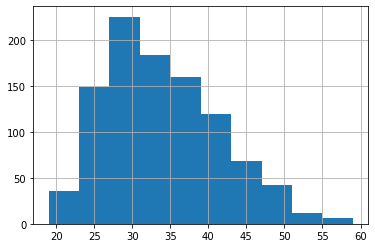

In [108]:
marathon.Age.hist()

### Parsing indicators with get_dummies()

In [109]:
marathon.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,First Name,Last Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,NaN,Rupp,Galen
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015,Chebet,Wilson


In [110]:
marathon.loc[marathon['Years Ran'].notnull()]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Years Ran,First Name,Last Name
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,2015,Chebet,Wilson
12,"Keflezighi, Meb",41,M,San Diego,CA,USA,2:17:00,13,13,2015,Keflezighi,Meb
13,"Nyasango, Cutbert",34,M,Harara,NaN,ZIM,2:17:40,14,14,2016,Nyasango,Cutbert
14,"Korir, Wesley",34,M,Kitale,NaN,KEN,2:18:14,15,15,2015:2016,Korir,Wesley
29,"Maravilla, Jorge",39,M,Mill Valley,CA,USA,2:24:27,30,27,2016,Maravilla,Jorge
...,...,...,...,...,...,...,...,...,...,...,...,...
986,"Bretz, Virgil",44,M,Mt. Kisco,NY,USA,2:56:02,987,931,2015:2016,Bretz,Virgil
987,"Cucuzzella, Mark",50,M,Shepherdstown,WV,USA,2:56:03,988,932,2016,Cucuzzella,Mark
988,"Carron, John B",46,M,Irvington,NY,USA,2:56:03,989,933,2016,Carron,John B
995,"Larosa, Mark",38,M,North Andover,MA,USA,2:56:06,996,940,2015:2016,Larosa,Mark


In [111]:
marathon['Years Ran'].unique()

array([nan, '2015', '2016', '2015:2016'], dtype=object)

In [114]:
dummies = marathon['Years Ran'].str.get_dummies(sep=':')
dummies.head()

,2015,2016
0,0,0
1,0,0
2,0,0
3,0,0
4,1,0


In [115]:
marathon.insert(marathon.columns.get_loc('Years Ran'),'Ran 2015', dummies['2015'])
marathon.insert(marathon.columns.get_loc('Years Ran'),'Ran 2016', dummies['2016'] )

In [116]:
marathon.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Ran 2015,Ran 2016,Years Ran,First Name,Last Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,0,0,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,0,0,NaN,Rupp,Galen
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,0,0,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,0,0,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,2:12:35,5,5,1,0,2015,Chebet,Wilson


In [117]:
# Q. which top runners from 2017 also ran in previous 2 marathons?
marathon.loc[marathon['Ran 2015']==1 & (marathon['Ran 2016']==1)]

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Ran 2015,Ran 2016,Years Ran,First Name,Last Name
0,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,2:09:37,1,1,0,0,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,M,Portland,OR,USA,2:09:58,2,2,0,0,NaN,Rupp,Galen
2,"Osako, Suguru",25,M,Machida-City,NaN,JPN,2:10:28,3,3,0,0,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,2:12:08,4,4,0,0,NaN,Biwott,Shadrack
5,"Abdirahman, Abdi",40,M,Phoenix,AZ,USA,2:12:45,6,6,0,0,NaN,Abdirahman,Abdi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,"Mejia Huerta, Bernardo B.",31,M,Mexico City,NaN,MEX,2:56:05,995,939,0,0,NaN,Mejia Huerta,Bernardo B.
995,"Larosa, Mark",38,M,North Andover,MA,USA,2:56:06,996,940,1,1,2015:2016,Larosa,Mark
997,"Mccue, Daniel T",40,M,Arlington,MA,USA,2:56:06,998,942,0,0,NaN,Mccue,Daniel T
998,"Larosa, John",35,M,Danbury,CT,USA,2:56:07,999,943,0,0,NaN,Larosa,John


In [118]:
# Q. cumbers of top runners from 2017 also ran in 2015
marathon['Ran 2015'].sum()

190

### Text Replacement

In [119]:
s

'Welcome to the text manipulation section'

In [120]:
s += '. This section is about text.'

In [121]:
s

'Welcome to the text manipulation section. This section is about text.'

In [122]:
s.replace('text', 'replaced')

'Welcome to the replaced manipulation section. This section is about replaced.'

In [123]:
s

'Welcome to the text manipulation section. This section is about text.'

In [126]:
marathon['M/F'].str.replace('F','Female').replace('M','Male').value_counts()

Male      944
Female     56
Name: M/F, dtype: int64

In [127]:
marathon['M/F'] = marathon['M/F'].str.replace('F','Female').replace('M','Male')

In [128]:
marathon

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Ran 2015,Ran 2016,Years Ran,First Name,Last Name
0,"Kirui, Geoffrey",24,Male,Keringet,NaN,KEN,2:09:37,1,1,0,0,NaN,Kirui,Geoffrey
1,"Rupp, Galen",30,Male,Portland,OR,USA,2:09:58,2,2,0,0,NaN,Rupp,Galen
2,"Osako, Suguru",25,Male,Machida-City,NaN,JPN,2:10:28,3,3,0,0,NaN,Osako,Suguru
3,"Biwott, Shadrack",32,Male,Mammoth Lakes,CA,USA,2:12:08,4,4,0,0,NaN,Biwott,Shadrack
4,"Chebet, Wilson",31,Male,Marakwet,NaN,KEN,2:12:35,5,5,1,0,2015,Chebet,Wilson
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,"Larosa, Mark",38,Male,North Andover,MA,USA,2:56:06,996,940,1,1,2015:2016,Larosa,Mark
996,"Williamson, Jerry A",43,Male,Raleigh,NC,USA,2:56:06,997,941,1,0,2015,Williamson,Jerry A
997,"Mccue, Daniel T",40,Male,Arlington,MA,USA,2:56:06,998,942,0,0,NaN,Mccue,Daniel T
998,"Larosa, John",35,Male,Danbury,CT,USA,2:56:07,999,943,0,0,NaN,Larosa,John


In [129]:
# case-insensitive replacement

In [132]:
marathon.Country.str.replace('UsA','United States', case=False)

0                KEN
1      United States
2                JPN
3      United States
4                KEN
           ...      
995    United States
996    United States
997    United States
998    United States
999    United States
Name: Country, Length: 1000, dtype: object

### Introduction to Regex

In [137]:
# Playground -  https://regex101.com

In [139]:
#### Meta Sequences:
# \d matches [0-9]
# \s matches [\r\t\n ]
# \w matches [a-zA-Z0-9]
# . matches every character except /n
#  \. to match .
# Changing w,s,d to uppercase will match opposites/complement.

#### Quantifiers:
# + one or more characters
# ? zero or one character
# {3,4} 3 to 4 characters.
# * zero or more characters.

### Advanced Concepts:

In [141]:
# Character sets/classes: [Am] = A or m , 
# [dl]ogs = dogs/logs, [^dl]ogs = except d/l
# [b-i]ogs = b,c,d,e,f,g,h,i
# [a-zA-Z]+ = all words

In [142]:
# Groups:
# capture those matches.
# () = everything
# (m) = all the letters m
# (\w+er) = all words ending with er.
# (\w+er) \1 = \1 matches another sequence of first capturing gorup.

In [176]:
# Anchors:
# ^ : matches at the beginning
# $ : matches at the end
# \b : word boundry
# \B : non-word boundry

In [144]:
# just search online for common use cases:
# password: 
# ^(?-.*[a-zA-z])(?-.*\d)[A-Za-z\d]{10,}$

### Validating Email

In [145]:
import re

In [161]:
pattern = r"\w\S*@.*\w"

In [147]:
re.findall(pattern, ' andy@howtopandas.com')

['andy@howtopandas.com']

In [148]:
re.findall(pattern, ' @howtopandas.com')

[]

In [149]:
# andy@gmail.com => ****@gmail.com

In [150]:
# 1. start with an actually valid email
# 2. capture the domain part of email
# 3. Replace everything except the captured group.

In [151]:
email = 'andy@howtopanadas.com'

In [160]:
pattern_two = r"\w\S*(@.*\w)"

In [155]:
re.sub(pattern, r"*****\1", email) # \1 means don't replace first group

'*****@howtopanadas.com'

In [156]:
# emailregex website checkout for use.

In [157]:
robust_pattern = re.compile(r"(^[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+$)")

In [158]:
email2 = 'andy@andy@andy.com'

In [162]:
re.findall(pattern,email2)

['andy@andy@andy.com']

In [163]:
re.findall(pattern_two, email2)

['@andy.com']

In [164]:
re.findall(robust_pattern, email2)

[]

### What is use of re.compile()

In [166]:
# re.compile() cached the regex, hence it was faster.
# since python 2+, pattern is compiled and cached automatically
# for a maximum of 100 regexes, by default.
# if you are working with more than 100 regexes, and accessing them frequently,
# please compile!

### Pandas str contains(), split(), and replace() with Regex

In [169]:
marathon.Name[marathon.Name.str.contains('Will')]

93            Vanos, William
199        Guzick, William F
415          Hartje, William
429         Adams, William C
456              Cunha, Will
526            Swenson, Will
571    Gates, William E. Jr.
711       Swanson, William G
814        Williamson, David
835             Vargas, Will
892             Rivera, Will
897      Feldman, William P.
936      Decamps, William M.
939        Versen, William R
996      Williamson, Jerry A
Name: Name, dtype: object

In [171]:
marathon.Name[marathon.Name.str.contains(r'[wW]ill', regex=True)]

93            Vanos, William
199        Guzick, William F
415          Hartje, William
429         Adams, William C
456              Cunha, Will
526            Swenson, Will
571    Gates, William E. Jr.
711       Swanson, William G
814        Williamson, David
835             Vargas, Will
892             Rivera, Will
897      Feldman, William P.
936      Decamps, William M.
939        Versen, William R
996      Williamson, Jerry A
Name: Name, dtype: object

In [173]:
# isolate first name will
marathon.Name[marathon.Name.str.contains(r',\s[wW]ill$', regex=True)]

456      Cunha, Will
526    Swenson, Will
835     Vargas, Will
892     Rivera, Will
Name: Name, dtype: object

In [175]:
marathon.Name[marathon.Name.str.contains(r',\s[wW]ill\b', regex=True)] # \b boundry anchor

456      Cunha, Will
526    Swenson, Will
835     Vargas, Will
892     Rivera, Will
Name: Name, dtype: object

In [177]:
# split()

In [178]:
marathon.Name.str.split(expand=True)

,0,1,2,3,4
0,"Kirui,",Geoffrey,None,None,None
1,"Rupp,",Galen,None,None,None
2,"Osako,",Suguru,None,None,None
3,"Biwott,",Shadrack,None,None,None
4,"Chebet,",Wilson,None,None,None
...,...,...,...,...,...
995,"Larosa,",Mark,None,None,None
996,"Williamson,",Jerry,A,None,None
997,"Mccue,",Daniel,T,None,None
998,"Larosa,",John,None,None,None


In [179]:
marathon.Name.str.split(r'\s', expand=True)

,0,1,2,3,4
0,"Kirui,",Geoffrey,None,None,None
1,"Rupp,",Galen,None,None,None
2,"Osako,",Suguru,None,None,None
3,"Biwott,",Shadrack,None,None,None
4,"Chebet,",Wilson,None,None,None
...,...,...,...,...,...
995,"Larosa,",Mark,None,None,None
996,"Williamson,",Jerry,A,None,None
997,"Mccue,",Daniel,T,None,None
998,"Larosa,",John,None,None,None


In [180]:
# replace()

In [204]:
marathon['Official Time']

0      2:09:37
1      2:09:58
2      2:10:28
3      2:12:08
4      2:12:35
        ...   
995    2:56:06
996    2:56:06
997    2:56:06
998    2:56:07
999    2:56:08
Name: Official Time, Length: 1000, dtype: object

In [182]:
# 2:09:16 -> 2 hours 9 mins 16 seconds

In [205]:
marathon['Official Time'].str.replace(r"(\d+):(\d+):(\d+)", r"\1 hours, \2 minutes \3 seconds", regex=True)

0      2 hours, 09 minutes 37 seconds
1      2 hours, 09 minutes 58 seconds
2      2 hours, 10 minutes 28 seconds
3      2 hours, 12 minutes 08 seconds
4      2 hours, 12 minutes 35 seconds
                    ...              
995    2 hours, 56 minutes 06 seconds
996    2 hours, 56 minutes 06 seconds
997    2 hours, 56 minutes 06 seconds
998    2 hours, 56 minutes 07 seconds
999    2 hours, 56 minutes 08 seconds
Name: Official Time, Length: 1000, dtype: object

### Challenge 2

In [223]:
# 1. Split teh official time into three seperate columns; one each for hours, minutes and seconds. 
# Store this df in final_times.
final_times = pd.DataFrame({'hours':marathon['Official Time'].str.replace(r"(\d+):(\d+):(\d+)", r"\1", regex=True),
                           'minutes': marathon['Official Time'].str.replace(r"(\d+):(\d+):(\d+)", r"\2", regex=True),
                           'seconds': marathon['Official Time'].str.replace(r"(\d+):(\d+):(\d+)", r"\3", regex=True)})
final_times
final_times = marathon['Official Time'].str.split(':',expand=True)
final_times.columns = ['hours', 'minutes', 'seconds']
final_times

,hours,minutes,seconds
0,2,09,37
1,2,09,58
2,2,10,28
3,2,12,08
4,2,12,35
...,...,...,...
995,2,56,06
996,2,56,06
997,2,56,06
998,2,56,07


In [224]:
# 2. in final_times df, create a new column called total that contains the total time in seconds.
# Add total column to marathon df.
# for eg. a run time of 2:09:37 would be shown on the total column as 7777.
final_times = final_times.astype(int)

final_times['total'] = final_times.hours*3600 + final_times.minutes*60 + final_times.seconds
final_times
marathon['total_time'] = final_times['total']
marathon.head()

,Name,Age,M/F,City,State,Country,Official Time,Overall,Gender,Ran 2015,Ran 2016,Years Ran,First Name,Last Name,total_time
0,"Kirui, Geoffrey",24,Male,Keringet,NaN,KEN,2:09:37,1,1,0,0,NaN,Kirui,Geoffrey,7777
1,"Rupp, Galen",30,Male,Portland,OR,USA,2:09:58,2,2,0,0,NaN,Rupp,Galen,7798
2,"Osako, Suguru",25,Male,Machida-City,NaN,JPN,2:10:28,3,3,0,0,NaN,Osako,Suguru,7828
3,"Biwott, Shadrack",32,Male,Mammoth Lakes,CA,USA,2:12:08,4,4,0,0,NaN,Biwott,Shadrack,7928
4,"Chebet, Wilson",31,Male,Marakwet,NaN,KEN,2:12:35,5,5,1,0,2015,Chebet,Wilson,7955


In [225]:
# 3. Do the runners in marathon df who also ran in 2016 have a higher/lower average time?
print(marathon[marathon['Ran 2016']==1].total_time.mean()) # higher
print(marathon.total_time.mean())

10043.12048192771
9985.35
